<a href="https://colab.research.google.com/github/Narusi/Python-Kurss/blob/master/Diena_15_praktiskais_uzdevumus_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt

Izmantojot lekcijā apskatītos koda paraugus, atrodiet

# 1. dzīvokļu īres cenu informāciju no kāda jums interesējoša rajona.<br>




In [37]:
ssLink = 'https://www.ss.com/lv/real-estate/flats/riga/teika/hand_over/'
data = pd.read_html(ssLink, header=0)[4].iloc[:,2:]
data.head(5)

,Sludinājumi \tdatums.2,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Piedāvājam ilgtermiņa īrei kompaktu divistabu ...,Vairoga 32,2,23,3/3,Renov.,11.74 €,270 €/mēn.
1,Izīrējam jauku 1-istabas Studio tipa dzīvokli ...,Aizpriežu 26,1,28,1/2,Jaun.,12.50 €,350 €/mēn.
2,Īpašnieks izīrē plašu 1-istabas dzīvokli ar vi...,Brīvības 296,1,36,1/3,P. kara,6.39 €,230 €/mēn.
3,"Dzīvoklis labā stāvoklī, silts, bez mēbelēm, s...",Ropažu 87,1,38,1/5,M. ģim.,5 €,190 €/mēn.
4,Tiek izīrēts pilnībā mēbelēts 2 istabu dzīvokl...,Kastrānes 1,2,36,5/5,Renov.,9.44 €,340 €/mēn.


## 1b.Atrodiet, kura stāva dzīvoklis ir visaugstākais patlabān tirgū.

In [43]:
data['Jumta_stavs'] = 0
data['Stavs'] = 0
data['Cena_Tira'] = 0.0
data['Freq'] = ''

for i in data.index:
    data.loc[i, 'Jumta_stavs'] = data.loc[i, 'Stāvs'].split('/')[-1]
    data.loc[i, 'Stavs'] = data.loc[i, 'Stāvs'].split('/')[0]
    data.loc[i, 'Cena_Tira'] = float(data.loc[i, 'Cena'].split('/')[0].strip().encode("ascii", "ignore"))
    data.loc[i, 'Freq'] = data.loc[i, 'Cena'].split('/')[-1].strip()

data['Cena_m2'] = data['Cena_Tira'].div(data['m2']).round(2)

data['Stavs'] = pd.to_numeric(data['Stavs'])
data['Jumta_stavs'] = pd.to_numeric(data['Jumta_stavs'])

data[data['Stavs']==data['Stavs'].max()]

,Sludinājumi \tdatums.2,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Jumta_stavs,Stavs,Cena_Tira,Freq,Cena_m2
4,Tiek izīrēts pilnībā mēbelēts 2 istabu dzīvokl...,Kastrānes 1,2,36,5/5,Renov.,9.44 €,340 €/mēn.,5,5,340.0,mēn.,9.44
13,"Tiek izīrēts saulains, mājīgs 3istabu dzīvokli...",Biķernieku 29,3,57,5/5,Hrušč.,8 €,456 €/mēn.,5,5,456.0,mēn.,8.00
14,Izīrē bez starpniekiem vienkāršu vienistabas d...,Biķernieku 63,1,33,5/5,Hrušč.,6.06 €,200 €/mēn.,5,5,200.0,mēn.,6.06
23,"Īpašnieks izīrē gaumīgu, mūsdienīgu, mājīgu un...",Ropažu 22,1,32,5/5,Hrušč.,9.38 €,300 €/mēn.,5,5,300.0,mēn.,9.38


## 1c Iegūtos rezultātus noglabājiet failā (CSV,XLSX,JSON)

In [45]:
data.to_csv('Data.csv')

## 1d. Uzzīmējiet cenu histogrammu attiecigajam rajonam.

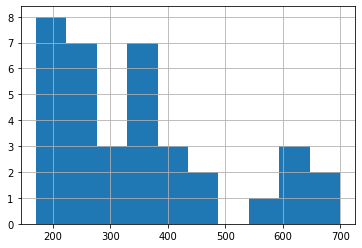

In [46]:
data['Cena_Tira'].hist()

#2. Atrodiet kāda automašīnu markas un modeļa pārdošanas cenas

Iegūtos rezultātus noglabājiet failā (CSV,XLSX,JSON)<br>
Ielādējiet rezultātus.<br>
Uzzīmējiet cenu histogrammu attiecigajam modelim.<br>
Lai veiktu šo darbību visticamāk nāksies attīrīt kolonnu ar cenām.<br><br>
<b>Tiem, kam ir pieredze ar Pandas:</b> 
Sagrupējiet modeļus pa gadiem un aspkatiet vidējās pārdošanas cenas.

In [75]:
autoLink = 'https://www.ss.com/lv/transport/cars/nissan/qashqai/sell/'

data = pd.read_html(autoLink, header=0)[4].iloc[:,2:]
for n in range(2,5):
    autoLink = f'https://www.ss.com/lv/transport/cars/nissan/qashqai/sell/page{n}.html'
    data = data.append(pd.read_html(autoLink, header=0)[4].iloc[:,2:])
    time.sleep(0.5)

data.index = list(range(len(data.index)))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sludinājumi 	datums.2  120 non-null    object
 1   Gads                   120 non-null    int64 
 2   Tilp.                  120 non-null    object
 3   Nobrauk.               120 non-null    object
 4   Cena                   120 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.6+ KB


In [76]:
data.head()
data['Dieasel'] = False
data['km'] = 0
data['Tira_cena'] = 0.0

for i in data.index:
    try:
        data.loc[i, 'Tira_cena'] = float(data.loc[i, 'Cena'].strip().replace(',','').encode("ascii", "ignore"))
        if not '-' in data.loc[i, 'Nobrauk.']:
            data.loc[i, 'km'] = float(data.loc[i, 'Nobrauk.'].split(' ')[0].strip())*100
    finally:
        if data.loc[i, 'Tilp.'].endswith('D'):
            data.loc[i,'Dieasel'] = True
            data.loc[i, 'Tilp.'] = data.loc[i, 'Tilp.'][:-1]
        data.loc[i, 'Tilp.'] = data.loc[i, 'Tilp.'].strip()

data['Tilp.'] = pd.to_numeric(data['Tilp.'])
data.head()

,Sludinājumi \tdatums.2,Gads,Tilp.,Nobrauk.,Cena,Dieasel,km,Tira_cena
0,"Tekna Plus, benzīns, automāts, Bose, pilnākā k...",2012,1.6,108 tūkst.,"9,450 €",False,10800.0,9450.0
1,Automašīna pirkta jauna un visas apkopes veikt...,2017,1.2,68 tūkst.,"15,000 €",False,6800.0,15000.0
2,Pārdod / Maiņa / Līzings Nissan Qashqai 2.0D /...,2011,2.0,222 tūkst.,"7,100 €",True,22200.0,7100.0
3,Pārdodu ģimenes auto 2.0 Dci ar defektu (nolec...,2008,2.0,244 tūkst.,"2,800 €",True,24400.0,2800.0
4,"Nissan Qashqai, Acenta komplektācija, 1.2 benz...",2018,1.2,29 tūkst.,"17,200 €",False,2900.0,17200.0


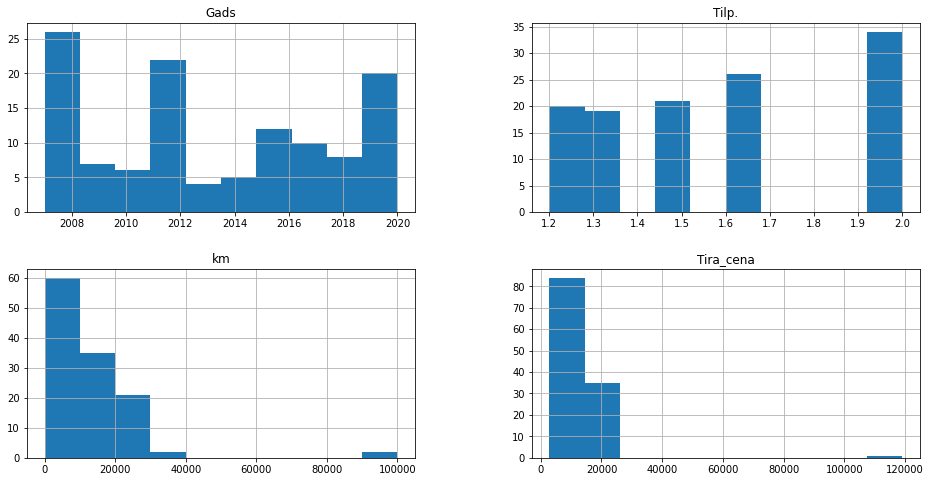

In [79]:
data[['Gads','Tilp.','km','Tira_cena']].hist(figsize=(16,8))
plt.show()

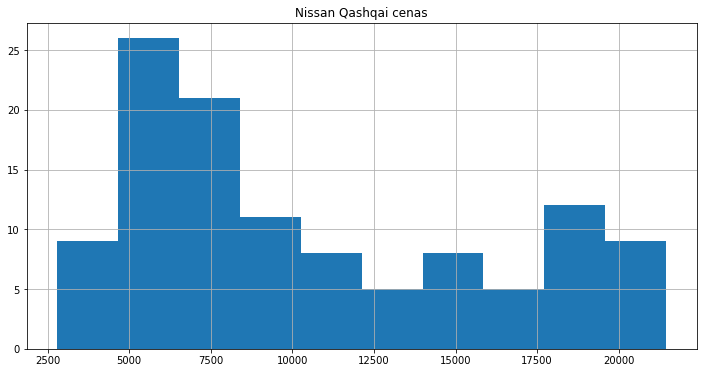

In [92]:
data.loc[data['Tira_cena']<=data['Tira_cena'].quantile(0.95),'Tira_cena'].hist(figsize=(12,6))
plt.title('Nissan Qashqai cenas')
plt.show();